In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
#Check the missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
#study the details of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#find the age of the car
#2021 is the current year
df["Car_Age"] = 2021 - df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [7]:
#drop the year column
#drop carname columns too, since it isnt of any use for our prediction
df.drop(["Car_Name", "Year"], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [8]:
#Print the unique values of all categorical features
print("Fuel Type:", df["Fuel_Type"].unique())
print("Seller Type:", df["Seller_Type"].unique())
print("Transmission:", df["Transmission"].unique())


Fuel Type: ['Petrol' 'Diesel' 'CNG']
Seller Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [9]:
#Convert the categorical features to dummy  variables
df = pd.get_dummies(df, drop_first= True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [10]:
#find the correlation od the dataset variables
df_corr= df.corr()
df_corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [11]:
import seaborn as sns

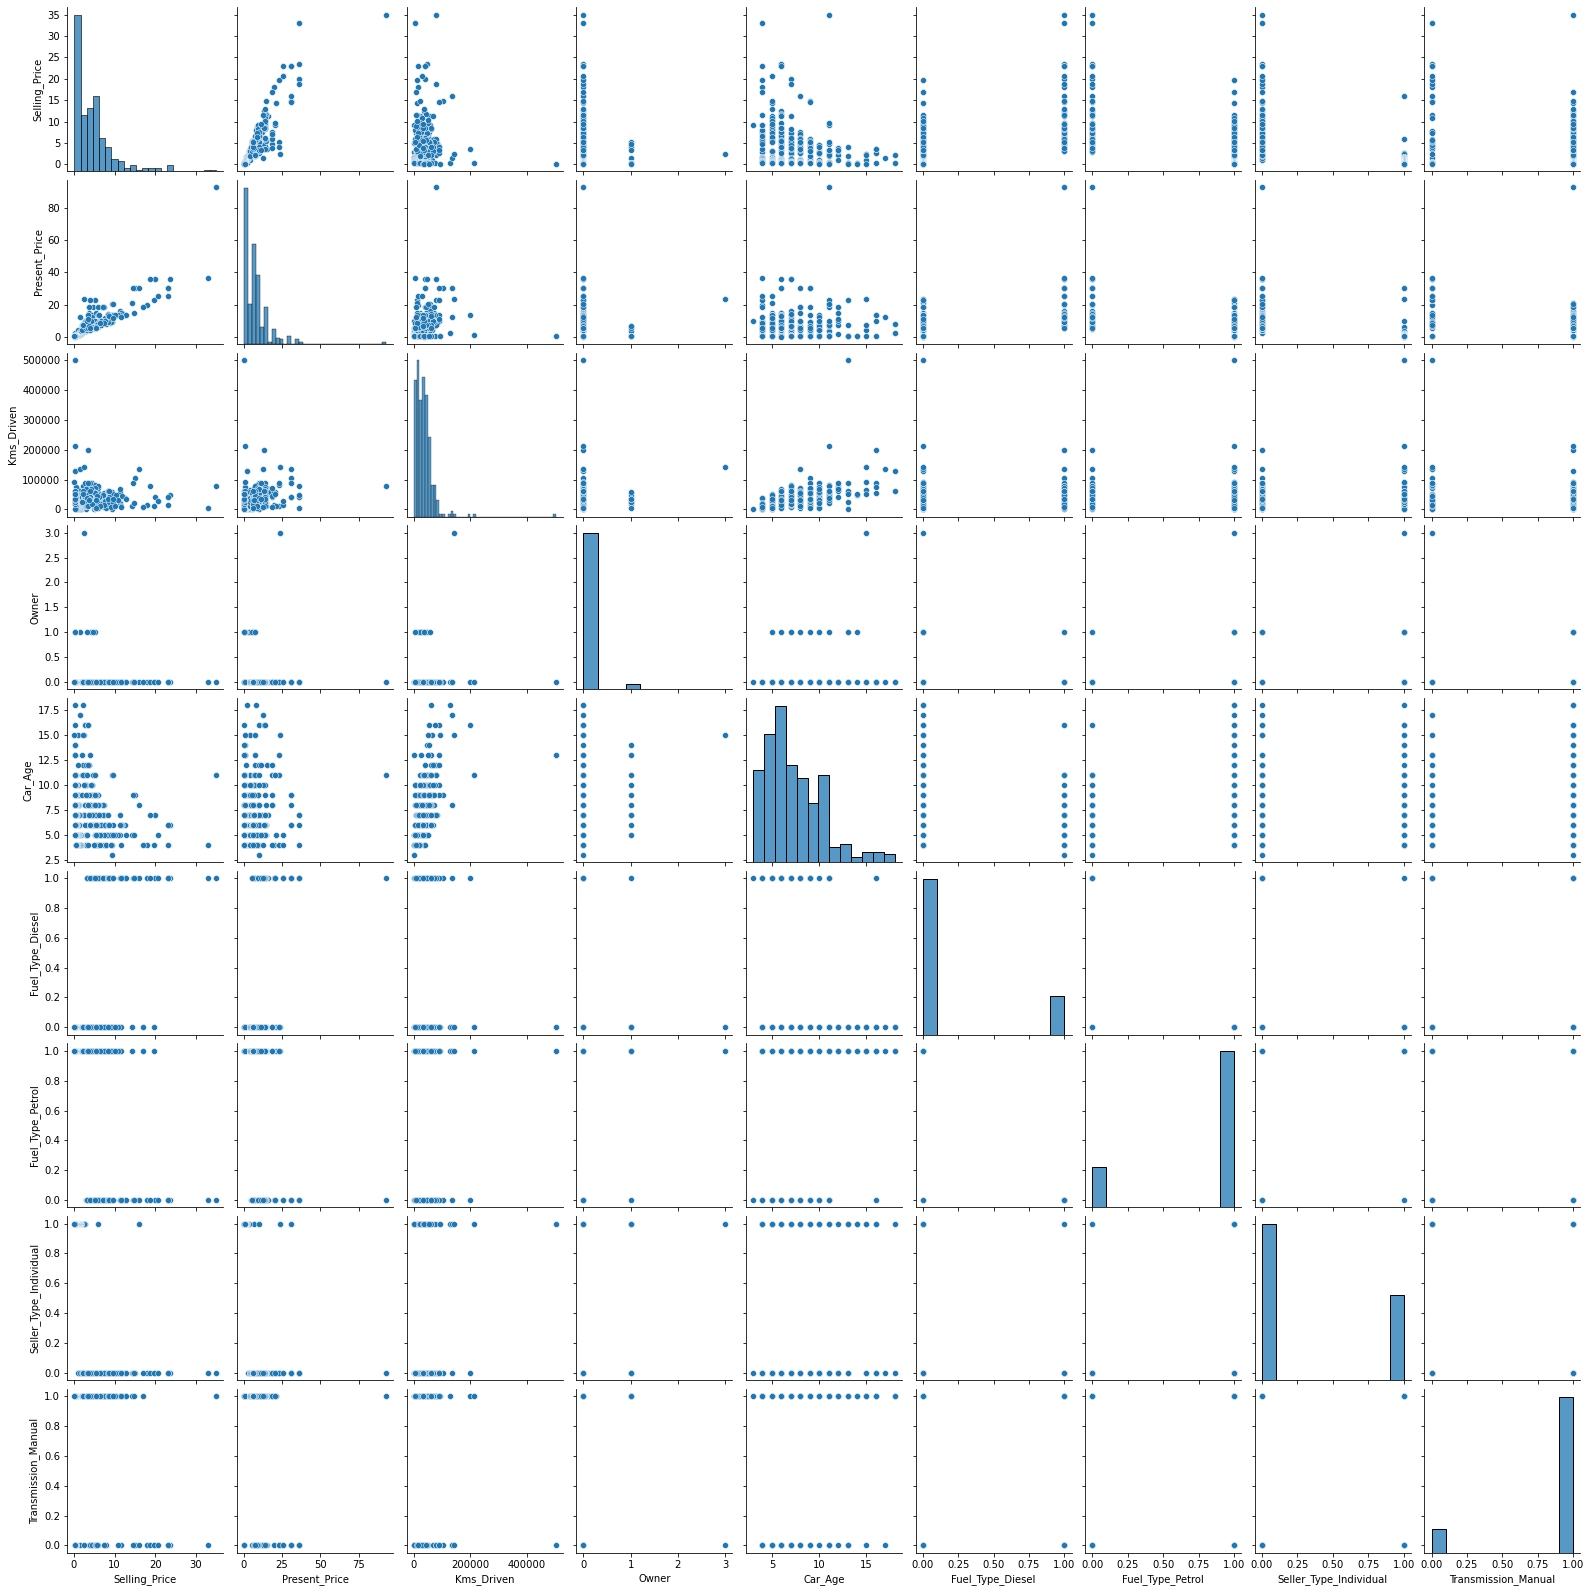

In [12]:
sns.pairplot(df)

In [13]:
df_corr.index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [14]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

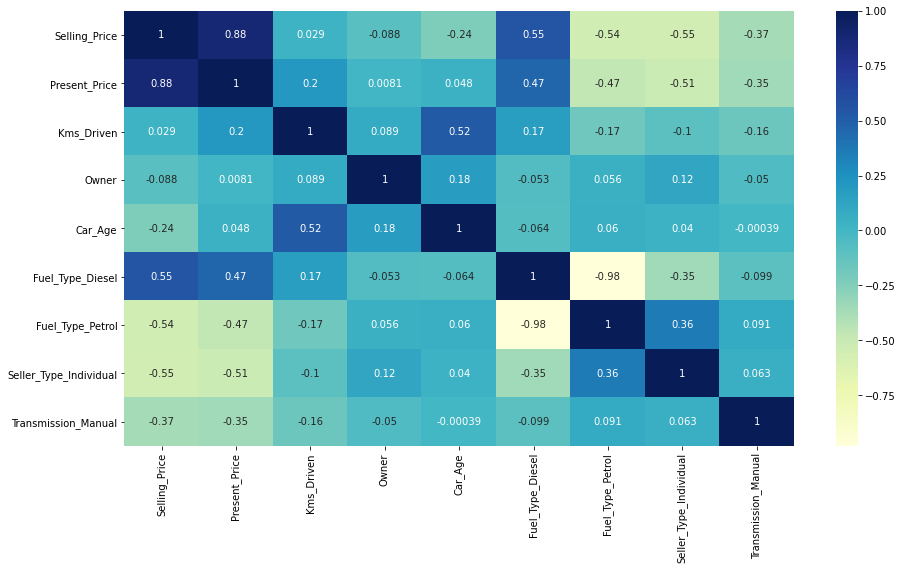

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [18]:
X = df.drop("Selling_Price", axis=1) #Independent features
y = df["Selling_Price"] #Dependent feature

In [19]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [20]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [21]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
ExtReg = ExtraTreesRegressor()
ExtReg.fit(X,y)

ExtraTreesRegressor()

In [22]:
ExtReg.feature_importances_

array([0.40299813, 0.0407874 , 0.0004376 , 0.07739477, 0.21354076,
       0.01259031, 0.12354   , 0.12871103])

In [23]:
feat_imp = pd.Series(ExtReg.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp

Present_Price             0.402998
Fuel_Type_Diesel          0.213541
Transmission_Manual       0.128711
Seller_Type_Individual    0.123540
Car_Age                   0.077395
Kms_Driven                0.040787
Fuel_Type_Petrol          0.012590
Owner                     0.000438
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape

(201, 8)

In [26]:
#Implement Random forest Regressor
#Dont need to scale the values, since Random forest Regressor uses Decsion tree
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor()
#rf_regr.fit(X,y)

In [27]:
import numpy as np

In [28]:
#Hyper Parameters of RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split= [2,5,10,15,100]
min_samples_leaf= [1,2,5,10]
    


In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
#create a random grid
random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf" : min_samples_leaf}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

#### Use the random grid to search for best hyperparameters

In [31]:
#First create the base model to tune  using RandomForestRegressor
rfr = RandomForestRegressor()

In [32]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

random_search =RandomizedSearchCV(estimator= rfr, param_distributions = random_grid, 
                                  n_iter=10, scoring="neg_mean_squared_error", 
                                  n_jobs=1, cv=5, verbose=2, random_state=42)

In [33]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
random_search.best_score_

-4.7614811326131425

In [36]:
predictions = random_search.predict(X_test)
predictions

array([ 0.74018,  9.79581,  5.5884 ,  0.36213,  6.6727 ,  6.09535,
        0.96525,  0.5988 ,  0.51023,  6.2018 , 11.11795,  0.84895,
        6.69948,  0.70876,  5.42625,  2.9322 ,  1.00027, 10.79905,
        0.63704,  1.44867,  0.52354,  8.81886,  5.96289,  2.8269 ,
        0.56078,  3.77955,  5.0502 ,  3.39325,  1.16159,  1.06818,
        0.7098 ,  9.80984,  0.44093,  2.74932,  8.57255,  4.1436 ,
        5.9396 ,  4.5727 ,  3.04863,  5.22197,  4.36475,  4.30767,
        4.90856,  0.65287,  6.69396,  0.54305,  6.96635,  5.61184,
        3.11755,  4.4298 ,  5.4299 ,  1.38475, 21.25959, 20.49498,
        6.6061 ,  7.81439,  5.06986,  9.95364,  2.81323,  6.54843,
        0.30261,  0.29589,  0.87724,  0.33016,  4.51225,  1.13238,
       20.08471, 20.81224,  6.23902,  0.55302,  4.48605,  4.1071 ,
        5.81967,  4.5045 ,  2.93406,  0.92428,  0.78274,  7.9342 ,
        0.4398 ,  8.79682,  5.14344,  3.48585, 11.848  , 10.08986,
        2.60777,  0.70946,  1.11599,  3.32089,  0.56738, 16.75

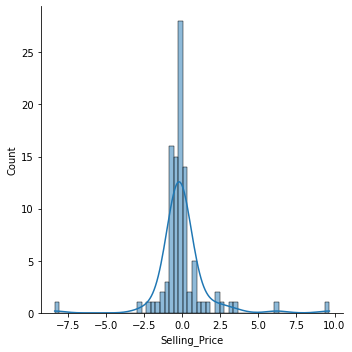

In [37]:
sns.displot(y_test-predictions, kde= True)

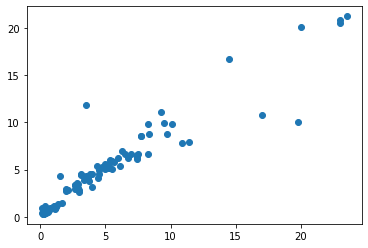

In [38]:
plt.scatter(y_test,predictions)

In [39]:
from sklearn import metrics

In [40]:
print("MAE: ", metrics.mean_absolute_error(y_test,predictions))
print("MSE: ", metrics.mean_squared_error(y_test,predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  0.8307435999999985
MSE:  2.8568266610459956
RMSE:  1.6902149748023165


In [41]:
import pickle


In [42]:
file = open("Random_Forest_Regr_model.pkl", "wb")
pickle.dump(random_search,file)